In [1]:
import pandas as pd
import folium

Para la lectura de base de datos se debe especificar el tipo de motor pues el tipo de archivo no esta entre las opciones estandar de la libreria pandas

In [2]:
#BD
df_avianca = pd.read_excel('./BD.xlsb', engine= 'pyxlsb', sheet_name='Capacity Tracking')

In [3]:
#Maestros
m_regiones = pd.read_excel('./BD.xlsb', engine= 'pyxlsb', sheet_name='Maestro Regiones')
m_aircraft = pd.read_excel('./BD.xlsb', engine= 'pyxlsb', sheet_name='Maestro Aircraft')

Revisión bd

In [6]:
df_avianca.shape

(393257, 14)

In [7]:
df_avianca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393257 entries, 0 to 393256
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            393257 non-null  int64  
 1   code_dep        393257 non-null  object 
 2   code_arr        393257 non-null  object 
 3   carrier         393257 non-null  object 
 4   equip           393257 non-null  object 
 5   operation_type  393257 non-null  object 
 6   Ciudad Origen   393257 non-null  object 
 7   Ciudad Destino  393257 non-null  object 
 8   carrier name    388163 non-null  object 
 9   weight_kg       393257 non-null  float64
 10  volume_m3       393257 non-null  float64
 11  atk             393257 non-null  float64
 12  frequency       393257 non-null  int64  
 13  block_hours     393257 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 42.0+ MB


Haciendo un recorrido preliminar de la base de datos hay muy pocos dats faltantes. En este punto es dificil decidir si se deben o no eliminar columnas o filas por lo cual lo mejor es cruzar la información con los maestros proporcionados y que es posible eliminar (columnas y/o regitros incompletos que generen ruido)

In [88]:
##Renombre de columnas para faciltar manipulación (las columnas en una bd no deberian tener espacios).
df_avianca.rename(columns={'Ciudad Origen': 'Ciudad_Origen', 
                           'Ciudad Destino': 'Ciudad_Destino',
                           'carrier name': 'carrier_name'}, inplace = True)

df_avianca.columns

Index(['Date', 'code_dep', 'code_arr', 'carrier', 'equip', 'operation_type',
       'Ciudad_Origen', 'Ciudad_Destino', 'carrier_name', 'weight_kg',
       'volume_m3', 'atk', 'frequency', 'block_hours'],
      dtype='object')

In [89]:
#cruzar base con maestro regiones (departure)
m_regiones_merge = m_regiones[['Airport_Code', 'Airport_Name', 'City_Name', 'Country_Name', 'Region_Name']]

df_info_dep = df_avianca.merge(m_regiones_merge, left_on='code_dep', right_on='Airport_Code')

df_info_dep.rename(columns={'Airport_Name': 'Airport_Name_dep', 
                           'City_Name': 'City_Name_dep',
                           'Country_Name': 'Country_Name_dep',
                           'Region_Name': 'Region_Name_dep'}, inplace = True)
df_info_dep = df_info_dep.drop(['code_dep', 'Airport_Code'], axis=1)

In [90]:
#cruzar base con maestro regiones (arrive)
df_info_arr = df_info_dep.merge(m_regiones_merge, left_on='code_arr', right_on='Airport_Code')

df_info_arr.rename(columns={'Airport_Name': 'Airport_Name_arr', 
                           'City_Name': 'City_Name_arr',
                           'Country_Name': 'Country_Name_arr',
                           'Region_Name': 'Region_Name_arr'}, inplace = True)
df_info_places = df_info_arr.drop(['code_arr', 'Airport_Code'], axis=1)


df_info_places.columns

Index(['Date', 'carrier', 'equip', 'operation_type', 'Ciudad_Origen',
       'Ciudad_Destino', 'carrier_name', 'weight_kg', 'volume_m3', 'atk',
       'frequency', 'block_hours', 'Airport_Name_dep', 'City_Name_dep',
       'Country_Name_dep', 'Region_Name_dep', 'Airport_Name_arr',
       'City_Name_arr', 'Country_Name_arr', 'Region_Name_arr'],
      dtype='object')

In [91]:
m_aircraft_merge = m_aircraft[['equip', 'aircraft_type', 'aircraft_full_name']]

df_final = df_info_places.merge(m_aircraft_merge, left_on='equip', right_on='equip')

df_final = df_final.drop(['equip'], axis=1)


In [92]:
df_final

,Date,carrier,operation_type,Ciudad_Origen,Ciudad_Destino,carrier_name,weight_kg,volume_m3,atk,frequency,...,Airport_Name_dep,City_Name_dep,Country_Name_dep,Region_Name_dep,Airport_Name_arr,City_Name_arr,Country_Name_arr,Region_Name_arr,aircraft_type,aircraft_full_name
0,2019011,GG,Charter,AGT,SCL,1SKGO,324192.0,2250.0,575190.0,3,...,Guarani Intl,Ciudad del Este,PARAGUAY,South America,Arturo Merino Benitez,Santiago,CHILE,South America,B747F,Boeing B747-400F
1,2019017,GG,Scheduled,AGT,SCL,1SKGO,216128.0,1500.0,383460.0,2,...,Guarani Intl,Ciudad del Este,PARAGUAY,South America,Arturo Merino Benitez,Santiago,CHILE,South America,B747F,Boeing B747-400F
2,2019031,GG,Scheduled,AGT,SCL,1SKGO,216128.0,1500.0,383460.0,2,...,Guarani Intl,Ciudad del Este,PARAGUAY,South America,Arturo Merino Benitez,Santiago,CHILE,South America,B747F,Boeing B747-400F
3,2019041,GG,Charter,AGT,SCL,1SKGO,216128.0,1500.0,383460.0,2,...,Guarani Intl,Ciudad del Este,PARAGUAY,South America,Arturo Merino Benitez,Santiago,CHILE,South America,B747F,Boeing B747-400F
4,2019041,GG,Scheduled,AGT,SCL,1SKGO,108064.0,750.0,191730.0,1,...,Guarani Intl,Ciudad del Este,PARAGUAY,South America,Arturo Merino Benitez,Santiago,CHILE,South America,B747F,Boeing B747-400F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393252,2020034,SWN,Part Charter,JER,GMC,120WEEN,9054.0,62.0,335.0,1,...,Jersey,Jersey,JERSEY,Northen Europe,Guerima,Guerima,COLOMBIA,South America,ATPF,BAE ATP Freighter
393253,2020035,SWN,Charter,JER,GMC,120WEEN,18108.0,124.0,670.0,2,...,Jersey,Jersey,JERSEY,Northen Europe,Guerima,Guerima,COLOMBIA,South America,ATPF,BAE ATP Freighter
393254,2020121,SWN,Charter,BDU,AVP,120WEEN,9054.0,62.0,8317.0,1,...,Bardufoss,Bardufoss,NORWAY,Northen Europe,Municipal,Scranton,UNITED STATES,North America,ATPF,BAE ATP Freighter
393255,2021015,SWN,Charter,BDU,AVP,120WEEN,18108.0,124.0,16634.0,2,...,Bardufoss,Bardufoss,NORWAY,Northen Europe,Municipal,Scranton,UNITED STATES,North America,ATPF,BAE ATP Freighter


In [107]:
ciudades_origen = df_final.Ciudad_Origen.unique()
ciudades_destino = df_final.Ciudad_Destino.unique()
tipos_operacion = df_final.operation_type.unique()
regiones_dep = df_final.Region_Name_dep.unique()
regiones_arr = df_final.Region_Name_arr.unique()
pais_dep = df_final.Country_Name_dep.unique()
pais_arr = df_final.Country_Name_arr.unique()
tipos_aviones = df_final.aircraft_full_name.unique()

print(f'''Se analizan el numero de elementos que hay por cada una de las caracteristicas que se cree son mas
relevantes obteniendo: 
        - Ciudades origen: {len(ciudades_origen)}
        - Ciudades destino: {len(ciudades_destino)}
        - Tipos operación: {len(tipos_operacion)}
        - Paices de salida: {len(pais_dep)}
        - Paices de llegada: {len(pais_arr)}
        - Regiones de salida: {len(regiones_dep)}
        - Regiones de llegada: {len(regiones_arr)}
        - Tipos de aviones: {len(tipos_aviones)}''')

Se analizan el numero de elementos que hay por cada una de las caracteristicas que se cree son mas
relevantes obteniendo: 
        - Ciudades origen: 1011
        - Ciudades destino: 1022
        - Tipos operación: 4
        - Paices de salida: 91
        - Paices de llegada: 90
        - Regiones de salida: 8
        - Regiones de llegada: 8
        - Tipos de aviones: 59


# Feature Engineering

In [108]:
#Obtener año y mes
df_final['Date'] = df_final['Date'].astype(str)
df_final['año'] = df_final['Date'].str.slice(0, 4)
df_final['mes'] = df_final['Date'].str.slice(4, 6)
df_final['dia_semana'] = df_final['Date'].str.slice(6, 7)

df = df_final.drop(['Date'], axis=1)
df.columns

Index(['carrier', 'operation_type', 'Ciudad_Origen', 'Ciudad_Destino',
       'carrier_name', 'weight_kg', 'volume_m3', 'atk', 'frequency',
       'block_hours', 'Airport_Name_dep', 'City_Name_dep', 'Country_Name_dep',
       'Region_Name_dep', 'Airport_Name_arr', 'City_Name_arr',
       'Country_Name_arr', 'Region_Name_arr', 'aircraft_type',
       'aircraft_full_name', 'año', 'mes', 'dia_semana'],
      dtype='object')

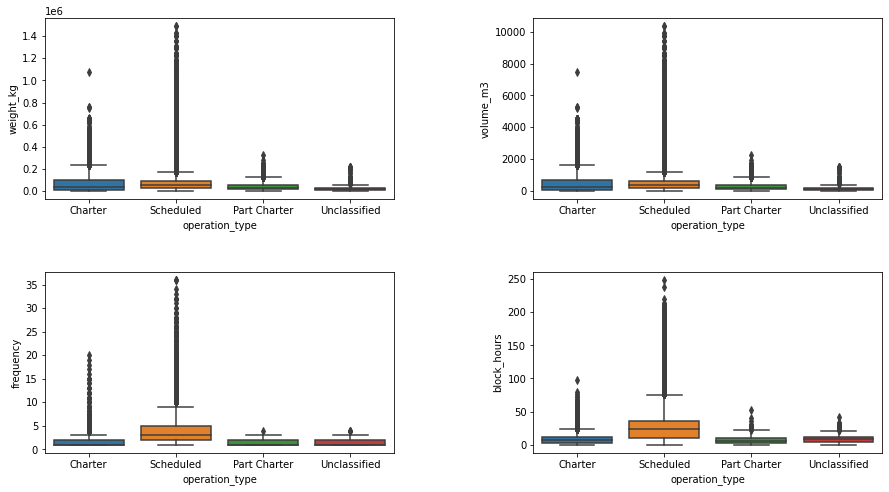

In [123]:
#Identificar outliers de peso (weight_kg), columen (volume_m3), frecuencia (frequency),
#horas de trabajo o horas bloque (block_hours)

##Se evaluaran los outliers por tipo de opeeración

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot( x=df["operation_type"], y=df["weight_kg"])
ax = fig.add_subplot(2, 2, 2)
sns.boxplot( x=df["operation_type"], y=df["volume_m3"])
ax = fig.add_subplot(2, 2, 3)
sns.boxplot( x=df["operation_type"], y=df["frequency"]);
ax = fig.add_subplot(2, 2, 4)
sns.boxplot( x=df["operation_type"], y=df["block_hours"]);
plt.show()